## TEST 

In [1]:
import torch
import torchvision

In [2]:
n_epochs = 3
batch_size_train = 64
batch_size_test = 1000
learning_rate = 0.01
momentum = 0.5
log_interval = 10

random_seed = 1
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)

In [20]:
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('../dataset/MNIST/', train=True, download=False,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('../dataset/MNIST/', train=False, download=False,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_test, shuffle=True)

In [21]:
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

In [22]:
example_data.shape

torch.Size([1000, 1, 28, 28])

In [23]:
example_targets.shape

torch.Size([1000])

In [24]:
import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])
fig

<Figure size 640x480 with 6 Axes>

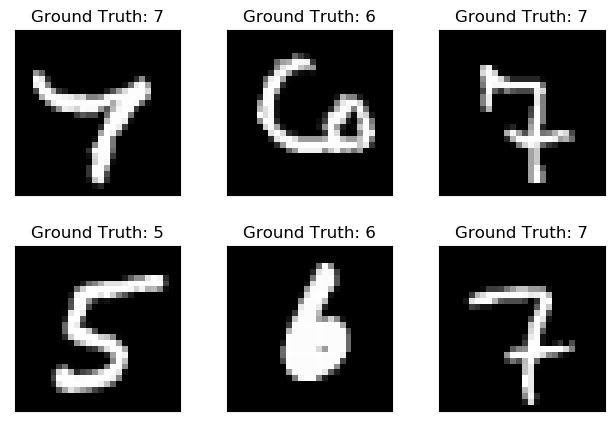

In [25]:
fig

In [26]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)

NameError: name 'nn' is not defined

In [1]:
network = Net()
optimizer = optim.SGD(network.parameters(), lr=learning_rate,
                      momentum=momentum)
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]

NameError: name 'Net' is not defined

In [34]:
def train(epoch):
  network.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    output = network(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % log_interval == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(train_loader.dataset),
        100. * batch_idx / len(train_loader), loss.item()))
      train_losses.append(loss.item())
      train_counter.append(
        (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
      torch.save(network.state_dict(), 'results/model.pth')
      torch.save(optimizer.state_dict(), 'results/optimizer.pth')

In [35]:
def test():
  network.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      output = network(data)
      test_loss += F.nll_loss(output, target, size_average=False).item()
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()
  test_loss /= len(test_loader.dataset)
  test_losses.append(test_loss)
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))

In [39]:
len(test_losses)

6

In [40]:
test_counter

[0, 60000, 120000, 180000]

In [42]:
test()
for epoch in range(1, n_epochs + 1):
  train(epoch)
  test()

/afs/inf.ed.ac.uk/user/s16/s1636732/miniconda3/envs/mlp/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.



Test set: Avg. loss: 0.0936, Accuracy: 9713/10000 (97%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 0.402946
Train Epoch: 1 [640/60000 (1%)]	Loss: 0.280889
Train Epoch: 1 [1280/60000 (2%)]	Loss: 0.166271
Train Epoch: 1 [1920/60000 (3%)]	Loss: 0.190452
Train Epoch: 1 [2560/60000 (4%)]	Loss: 0.339608
Train Epoch: 1 [3200/60000 (5%)]	Loss: 0.215573
Train Epoch: 1 [3840/60000 (6%)]	Loss: 0.152794
Train Epoch: 1 [4480/60000 (7%)]	Loss: 0.276882
Train Epoch: 1 [5120/60000 (9%)]	Loss: 0.235839
Train Epoch: 1 [5760/60000 (10%)]	Loss: 0.163218
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.425075
Train Epoch: 1 [7040/60000 (12%)]	Loss: 0.174717
Train Epoch: 1 [7680/60000 (13%)]	Loss: 0.285844
Train Epoch: 1 [8320/60000 (14%)]	Loss: 0.364738
Train Epoch: 1 [8960/60000 (15%)]	Loss: 0.278329
Train Epoch: 1 [9600/60000 (16%)]	Loss: 0.211580
Train Epoch: 1 [10240/60000 (17%)]	Loss: 0.274068
Train Epoch: 1 [10880/60000 (18%)]	Loss: 0.266534
Train Epoch: 1 [11520/60000 (19%)]	Loss: 0.277757
Train Epoch: 1 [12160

Train Epoch: 2 [44160/60000 (74%)]	Loss: 0.195591
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.385261
Train Epoch: 2 [45440/60000 (76%)]	Loss: 0.326653
Train Epoch: 2 [46080/60000 (77%)]	Loss: 0.260855
Train Epoch: 2 [46720/60000 (78%)]	Loss: 0.233761
Train Epoch: 2 [47360/60000 (79%)]	Loss: 0.188080
Train Epoch: 2 [48000/60000 (80%)]	Loss: 0.120827
Train Epoch: 2 [48640/60000 (81%)]	Loss: 0.182642
Train Epoch: 2 [49280/60000 (82%)]	Loss: 0.139394
Train Epoch: 2 [49920/60000 (83%)]	Loss: 0.046617
Train Epoch: 2 [50560/60000 (84%)]	Loss: 0.274131
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.285006
Train Epoch: 2 [51840/60000 (86%)]	Loss: 0.223890
Train Epoch: 2 [52480/60000 (87%)]	Loss: 0.330681
Train Epoch: 2 [53120/60000 (88%)]	Loss: 0.293369
Train Epoch: 2 [53760/60000 (90%)]	Loss: 0.347067
Train Epoch: 2 [54400/60000 (91%)]	Loss: 0.154466
Train Epoch: 2 [55040/60000 (92%)]	Loss: 0.238626
Train Epoch: 2 [55680/60000 (93%)]	Loss: 0.069181
Train Epoch: 2 [56320/60000 (94%)]	Loss: 0.177888


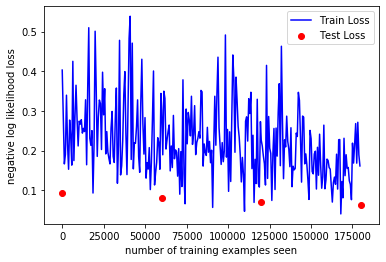

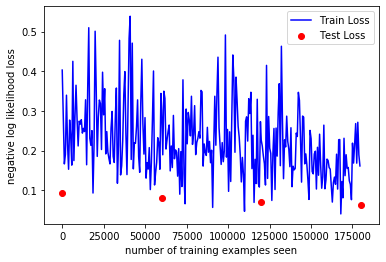

In [43]:
fig = plt.figure()
plt.plot(train_counter, train_losses, color='blue')
plt.scatter(test_counter, test_losses, color='red')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')
fig

In [44]:
continued_network = Net()
continued_optimizer = optim.SGD(network.parameters(), lr=learning_rate,
                                momentum=momentum)

In [46]:
network_state_dict = torch.load('results/model.pth')
continued_network.load_state_dict(network_state_dict)

optimizer_state_dict = torch.load('results/optimizer.pth')
continued_optimizer.load_state_dict(optimizer_state_dict)

In [47]:
for i in range(4,9):
  test_counter.append(i*len(train_loader.dataset))
  train(i)
  test()

/afs/inf.ed.ac.uk/user/s16/s1636732/miniconda3/envs/mlp/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Train Epoch: 4 [0/60000 (0%)]	Loss: 0.159800
Train Epoch: 4 [640/60000 (1%)]	Loss: 0.191029
Train Epoch: 4 [1280/60000 (2%)]	Loss: 0.322917
Train Epoch: 4 [1920/60000 (3%)]	Loss: 0.128015
Train Epoch: 4 [2560/60000 (4%)]	Loss: 0.417403
Train Epoch: 4 [3200/60000 (5%)]	Loss: 0.218803
Train Epoch: 4 [3840/60000 (6%)]	Loss: 0.125956
Train Epoch: 4 [4480/60000 (7%)]	Loss: 0.162966
Train Epoch: 4 [5120/60000 (9%)]	Loss: 0.388845
Train Epoch: 4 [5760/60000 (10%)]	Loss: 0.077005
Train Epoch: 4 [6400/60000 (11%)]	Loss: 0.078961
Train Epoch: 4 [7040/60000 (12%)]	Loss: 0.309917
Train Epoch: 4 [7680/60000 (13%)]	Loss: 0.129336
Train Epoch: 4 [8320/60000 (14%)]	Loss: 0.488221
Train Epoch: 4 [8960/60000 (15%)]	Loss: 0.149512
Train Epoch: 4 [9600/60000 (16%)]	Loss: 0.399017
Train Epoch: 4 [10240/60000 (17%)]	Loss: 0.201259
Train Epoch: 4 [10880/60000 (18%)]	Loss: 0.217485
Train Epoch: 4 [11520/60000 (19%)]	Loss: 0.213222
Train Epoch: 4 [12160/60000 (20%)]	Loss: 0.308159
Train Epoch: 4 [12800/60000 (

Train Epoch: 5 [44800/60000 (75%)]	Loss: 0.106091
Train Epoch: 5 [45440/60000 (76%)]	Loss: 0.137605
Train Epoch: 5 [46080/60000 (77%)]	Loss: 0.263017
Train Epoch: 5 [46720/60000 (78%)]	Loss: 0.135052
Train Epoch: 5 [47360/60000 (79%)]	Loss: 0.152056
Train Epoch: 5 [48000/60000 (80%)]	Loss: 0.145396
Train Epoch: 5 [48640/60000 (81%)]	Loss: 0.137276
Train Epoch: 5 [49280/60000 (82%)]	Loss: 0.106260
Train Epoch: 5 [49920/60000 (83%)]	Loss: 0.165765
Train Epoch: 5 [50560/60000 (84%)]	Loss: 0.218050
Train Epoch: 5 [51200/60000 (85%)]	Loss: 0.186169
Train Epoch: 5 [51840/60000 (86%)]	Loss: 0.417418
Train Epoch: 5 [52480/60000 (87%)]	Loss: 0.198226
Train Epoch: 5 [53120/60000 (88%)]	Loss: 0.104751
Train Epoch: 5 [53760/60000 (90%)]	Loss: 0.172383
Train Epoch: 5 [54400/60000 (91%)]	Loss: 0.167882
Train Epoch: 5 [55040/60000 (92%)]	Loss: 0.132137
Train Epoch: 5 [55680/60000 (93%)]	Loss: 0.121087
Train Epoch: 5 [56320/60000 (94%)]	Loss: 0.387501
Train Epoch: 5 [56960/60000 (95%)]	Loss: 0.177705


Train Epoch: 7 [28800/60000 (48%)]	Loss: 0.058604
Train Epoch: 7 [29440/60000 (49%)]	Loss: 0.139484
Train Epoch: 7 [30080/60000 (50%)]	Loss: 0.074804
Train Epoch: 7 [30720/60000 (51%)]	Loss: 0.130829
Train Epoch: 7 [31360/60000 (52%)]	Loss: 0.179344
Train Epoch: 7 [32000/60000 (53%)]	Loss: 0.141346
Train Epoch: 7 [32640/60000 (54%)]	Loss: 0.186769
Train Epoch: 7 [33280/60000 (55%)]	Loss: 0.398369
Train Epoch: 7 [33920/60000 (57%)]	Loss: 0.082219
Train Epoch: 7 [34560/60000 (58%)]	Loss: 0.109928
Train Epoch: 7 [35200/60000 (59%)]	Loss: 0.113867
Train Epoch: 7 [35840/60000 (60%)]	Loss: 0.175576
Train Epoch: 7 [36480/60000 (61%)]	Loss: 0.179764
Train Epoch: 7 [37120/60000 (62%)]	Loss: 0.181392
Train Epoch: 7 [37760/60000 (63%)]	Loss: 0.128537
Train Epoch: 7 [38400/60000 (64%)]	Loss: 0.287437
Train Epoch: 7 [39040/60000 (65%)]	Loss: 0.129562
Train Epoch: 7 [39680/60000 (66%)]	Loss: 0.175464
Train Epoch: 7 [40320/60000 (67%)]	Loss: 0.145250
Train Epoch: 7 [40960/60000 (68%)]	Loss: 0.179571


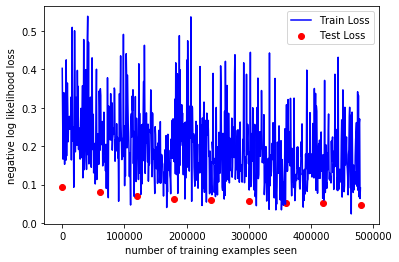

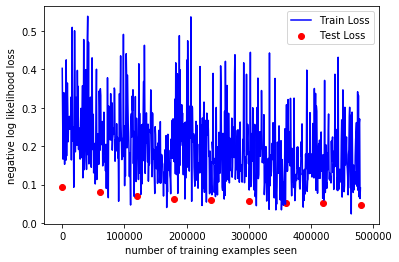

In [48]:
fig = plt.figure()
plt.plot(train_counter, train_losses, color='blue')
plt.scatter(test_counter, test_losses, color='red')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')
fig

In [1]:
import os
import tqdm
import torch
import CustomModels
import CustomDataset
import numpy as np
import pickle
from CustomModels import hierarchical_model
from experiment_builder import ExperimentBuilder
from CustomDataset import dataset_partition
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models

transform_test_MNIST = transforms.Compose([
    transforms.Pad(2, fill=0, padding_mode='constant'),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

partition_folder = "MNIST_hierarchical_test/partition_0/saved_models"
model = CustomModels.load_model("Custom_05", 1, 2)
#experiment = ExperimentBuilder(model, "", -1, test_loader, test_loader, test_loader)
#experiment.load_model(model_save_dir=partition_folder, model_idx="19",model_save_name="train_model")
_,_,test_data = CustomDataset.load_dataset(dataset_name = "MNIST", distribution_name="balanced_5000", transform= transform_test_MNIST)
test_loader = DataLoader(test_data, batch_size=100, shuffle=True, num_workers=4)
a= test_loader.__iter__()
x = a.next()

8380


In [2]:
ld = DataLoader(test_data, batch_size=1620, shuffle=True, num_workers=4)

In [3]:
inp = ld.__iter__().next()

In [4]:
out = model(inp[0])

In [5]:
out.shape

torch.Size([1620, 2])

In [32]:
x

[tensor([[[[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
           [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
           [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
           ...,
           [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
           [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
           [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242]]],
 
 
         [[[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
           [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
           [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
           ...,
           [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
           [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
           [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242]]],
 
 
         [[[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
       

In [30]:
len(testdata.targets)

1620

In [24]:
x = a.next()

StopIteration: 

In [92]:
experiment.train()
six=torch.argmax(experiment.model(x[0]).data, 1)==0
print(x[1][six])
x_2, y_2 = x[0].float().to(device=torch.device('cpu')), x[1].long().to(
            device=torch.device('cpu'))
six=torch.argmax(experiment.model(x_2).data, 1)==0
print(y_2[six])
x_2, y_2  = x_2.float().to(device=torch.device('cpu')), y_2.long().to(
            device=torch.device('cpu'))
six=torch.argmax(experiment.model(x_2).data, 1)==0
print(y_2[six])

tensor([8, 0, 0, 4, 8, 0, 5, 6, 6, 2, 6, 8, 6, 4, 6, 0, 0, 6, 4, 0, 6, 0, 0, 0,
        6, 0, 4, 5, 0, 0, 0, 6, 6, 0])
tensor([8, 0, 0, 4, 8, 0, 5, 6, 6, 2, 6, 8, 6, 4, 6, 0, 0, 6, 4, 0, 6, 0, 0, 0,
        6, 0, 4, 5, 0, 0, 0, 6, 6, 0])
tensor([8, 0, 0, 4, 8, 0, 5, 6, 6, 2, 6, 8, 6, 4, 6, 0, 0, 6, 4, 0, 6, 0, 0, 0,
        6, 0, 4, 5, 0, 0, 0, 6, 6, 0])


In [93]:
experiment.run_evaluation_iter(x[0], x[1])

tensor([9, 2, 3, 8, 8, 5, 0, 4, 0, 3, 2, 4, 4, 8, 2, 0, 8, 8, 9, 5, 2, 5, 6, 6,
        5, 2, 9, 3, 6, 8, 9, 2, 7, 3, 2, 6, 2, 1, 4, 6, 4, 2, 7, 0, 0, 1, 3, 6,
        4, 0, 8, 9, 6, 2, 0, 0, 0, 7, 6, 4, 0, 3, 1, 1, 4, 3, 9, 5, 9, 9, 1, 2,
        8, 7, 2, 0, 0, 9, 1, 7, 7, 5, 3, 8, 9, 4, 9, 4, 3, 5, 9, 3, 4, 0, 6, 2,
        9, 9, 6, 0])
tensor([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
        1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
        1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
        1, 1, 0, 0])


RuntimeError: Assertion `cur_target >= 0 && cur_target < n_classes' failed.  at /opt/conda/conda-bld/pytorch_1565287142374/work/aten/src/THNN/generic/ClassNLLCriterion.c:94

tensor(3)


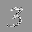

In [113]:
index = 6
print(x[1][index])
T(x[0][index])

In [48]:
with open('data/partition_object_test.txt', 'rb') as f: 
    partitions = pickle.load(f)
partition = partitions
test_data = CustomDataset.load_partition_dataset(dataset_name="MNIST", partition=partition, transform=transform_test_MNIST, train=False)
test_data_loader = DataLoader(test_data, batch_size=100, shuffle=True, num_workers=4)
a_2 = test_data_loader.__iter__()
x_2 = a_2.next()

In [80]:
x_2[1]

tensor([1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
        1, 1, 1, 1])

In [108]:
six=torch.argmax(experiment.model(x_2[0]).data, 1)==0
print(len(six))
print(torch.sum(six))

100
tensor(37)


In [93]:
x_2[1][six]

tensor([1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
        1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [56]:
T = transforms.ToPILImage()

tensor(1)


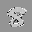

In [101]:
index = 7
print(x_2[1][six][index])
T(x_2[0][six][index])

In [10]:
import torch
import numpy as np
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as models



In [107]:
cost_matrix = np.reshape(np.arange(0,100),(10,10))
x = torch.tensor(np.reshape(np.arange(0,200),(20,10))).type(torch.DoubleTensor)
y = torch.tensor((np.arange(19,-1,-1) / 2).astype(int))

In [108]:
cots_used = torch.tensor(cost_matrix).type(torch.DoubleTensor)[y,:]
weighted_exp_output = cots_used * torch.exp(x)
weighted_softmax= weighted_exp_output / torch.sum(weighted_exp_output, axis=0)
torch.log(weighted_softmax)

tensor([[-1.6780e+02, -1.8549e+02, -1.8617e+02, -1.8657e+02, -1.8684e+02,
         -1.8706e+02, -1.8723e+02, -1.8737e+02, -1.8749e+02, -1.8760e+02],
        [-1.5780e+02, -1.7549e+02, -1.7617e+02, -1.7657e+02, -1.7684e+02,
         -1.7706e+02, -1.7723e+02, -1.7737e+02, -1.7749e+02, -1.7760e+02],
        [-1.4792e+02, -1.6561e+02, -1.6629e+02, -1.6668e+02, -1.6696e+02,
         -1.6717e+02, -1.6734e+02, -1.6748e+02, -1.6760e+02, -1.6771e+02],
        [-1.3792e+02, -1.5561e+02, -1.5629e+02, -1.5668e+02, -1.5696e+02,
         -1.5717e+02, -1.5734e+02, -1.5748e+02, -1.5760e+02, -1.5771e+02],
        [-1.2805e+02, -1.4574e+02, -1.4642e+02, -1.4681e+02, -1.4708e+02,
         -1.4729e+02, -1.4746e+02, -1.4760e+02, -1.4772e+02, -1.4783e+02],
        [-1.1805e+02, -1.3574e+02, -1.3642e+02, -1.3681e+02, -1.3708e+02,
         -1.3729e+02, -1.3746e+02, -1.3760e+02, -1.3772e+02, -1.3783e+02],
        [-1.0821e+02, -1.2589e+02, -1.2657e+02, -1.2696e+02, -1.2723e+02,
         -1.2744e+02, -1.2760e+0

In [109]:
a = CoSenLogSoftmax(cost_matrix)

In [110]:
a(x,y)

tensor([[-1.6780e+02, -1.8549e+02, -1.8617e+02, -1.8657e+02, -1.8684e+02,
         -1.8706e+02, -1.8723e+02, -1.8737e+02, -1.8749e+02, -1.8760e+02],
        [-1.5780e+02, -1.7549e+02, -1.7617e+02, -1.7657e+02, -1.7684e+02,
         -1.7706e+02, -1.7723e+02, -1.7737e+02, -1.7749e+02, -1.7760e+02],
        [-1.4792e+02, -1.6561e+02, -1.6629e+02, -1.6668e+02, -1.6696e+02,
         -1.6717e+02, -1.6734e+02, -1.6748e+02, -1.6760e+02, -1.6771e+02],
        [-1.3792e+02, -1.5561e+02, -1.5629e+02, -1.5668e+02, -1.5696e+02,
         -1.5717e+02, -1.5734e+02, -1.5748e+02, -1.5760e+02, -1.5771e+02],
        [-1.2805e+02, -1.4574e+02, -1.4642e+02, -1.4681e+02, -1.4708e+02,
         -1.4729e+02, -1.4746e+02, -1.4760e+02, -1.4772e+02, -1.4783e+02],
        [-1.1805e+02, -1.3574e+02, -1.3642e+02, -1.3681e+02, -1.3708e+02,
         -1.3729e+02, -1.3746e+02, -1.3760e+02, -1.3772e+02, -1.3783e+02],
        [-1.0821e+02, -1.2589e+02, -1.2657e+02, -1.2696e+02, -1.2723e+02,
         -1.2744e+02, -1.2760e+0

In [1]:
from scipy.spatial import distance
import numpy as np
a = np.random.random((10,5))
b = np.random.random((15,5))

In [2]:

inter = np.amin(distance.cdist(a,b), axis=1)
intra = np.amin(distance.cdist(a,a) + np.eye(10) * np.amax(distance.cdist(a, a)), axis=1)

In [3]:
np.mean(intra / inter)

1.080433001449821

In [2]:
from util import *

In [5]:
class_separability(a, b)

1.080433001449821

In [9]:
np.unique(np.array([3,3,1,2,2,1,1]))

array([1, 2, 3])

In [34]:
test_data.targets.numpy()

array([4, 9, 9, ..., 7, 3, 6])

In [7]:
class_separability_matrix(out.data.numpy(), test_data.targets.numpy())

[ 2.52553701  0.98089206  5.45934552  1.65770527  5.12400055  4.03575198
  1.45370359  0.56892885  5.29432166  0.97528513  2.90473061  1.58942686
 14.24573584  0.5612011   0.60097491  1.86133884  1.37843428  1.58610769
  1.95261404  1.35459502  2.10933348  1.91001863  2.10865242  4.0401444
  0.74713429  1.04404411  0.81357806  1.86328846  0.59371086  1.32744721
  0.44205354  0.53684526  4.78189407  2.56877616  2.75551336  2.19503235
  1.28514462  2.79538739  0.95980574  1.12655431 12.13486848  4.91341625
  0.71958014  1.56816894  1.06805032  1.78929893  1.61592607  1.94450038
  2.98939741  1.5028165  15.7682138   2.36907345  1.6338563   1.32201915
  5.42481971  3.55564766  9.69811634  1.4609414   2.0340025   7.14203746
  1.35822423  1.43634146  2.51986429  1.70513277  1.33573651  0.93676685
  1.64843479  1.33855679  1.56236814  1.40095964  3.96600066  1.69643848
  2.44552976  0.80606336  4.22347306  0.37790115  1.0990598   0.84255721
  1.14904986  1.49539769  0.86870299  7.48434494  3.

array([[1.        , 2.67382509, 1.97303328, 1.69971948, 1.84814085,
        0.96714549, 1.43571269, 2.46890832, 1.52523525, 1.73172564],
       [1.19499953, 1.        , 1.09220486, 1.09146893, 1.08276771,
        0.58726808, 0.96312959, 1.18610056, 0.9704594 , 1.11690508],
       [1.25725881, 1.60577705, 1.        , 1.45023068, 1.29788903,
        0.7240848 , 1.34707833, 1.47171877, 1.40264604, 1.25332192],
       [1.2276848 , 1.87659328, 1.69095782, 1.        , 1.32939087,
        0.75848437, 1.24854916, 1.66526232, 1.14518683, 1.59898989],
       [1.69091246, 2.10881176, 1.79179505, 1.61154594, 1.        ,
        0.87845482, 1.68596647, 1.73615746, 1.54428768, 1.62444485],
       [2.10313326, 3.27355613, 2.34335761, 2.0486543 , 2.01919937,
        1.        , 1.89219778, 7.92828642, 1.83098255, 1.93266959],
       [1.67447662, 2.35889571, 2.05476426, 1.77260179, 1.91626144,
        0.96879568, 1.        , 2.22799221, 1.65178898, 2.07621599],
       [1.87405391, 1.87166982, 1.5669697

In [3]:
a = np.array([[1,2],[3,4]]) * np.array([[1,2],[3,4]])

In [4]:
sudo_normalize(a)

array([[0.65503876, 0.18992248],
       [0.03488372, 1.12015504]])

In [5]:
a

array([[ 1,  4],
       [ 9, 16]])